In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [190]:
df_train = pd.read_csv("../dataset/train.csv")
df_train_id = df_train.pop("Id")
df_train_target = df_train.pop("CO2 Emissions(g/km)")
df_train

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km
1,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km
2,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.
3,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km
4,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km
...,...,...,...,...,...,...,...,...,...
54932,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90 L/100km,11.36 km per L,22.39 MPG (AS)
54933,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,2.10 L/10km,1.06 L/10km,14.41 MPG (AS)
54934,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.20 L/100km,12.50 L/100km,15.63 L/100 km
54935,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.30 L/100 km,9.90 liters per 100 km,14.52 L/100 km


In [191]:
df_test = pd.read_csv("../dataset/test.csv")
df_test_id = df_test.pop("Id")
df_test

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.20 liters per 100 km,15.20 liters per 100 km,16.06 MPG (AS)
1,BMV,COMPACT,2.0,4.0,A8,Z,9.10 L/100 km,43.46 mpg Imp.,29.66 MPG (AS)
2,JIPU,SUV - SMALL,1.3,4.0,A9,X,27.69 mpg Imp.,7.80 liters per 100 km,9.12 liters per 100 km
3,LECUS,SUV - SMALL,not-recorded,4.0,AS6,Z,NaN,26.43 MPG (AS),NaN
4,BARUSU,COMPACT,2.0,unestablished,M6,Z,11.36 km/L,39.79 mpg Imp.,8.04 L/100km
...,...,...,...,...,...,...,...,...,...
23540,MITSU,SUV - SMALL,2.0,4.0,M5,X,NaN,13.33 km/L,8.98 L/100km
23541,CHEVO,COMPACT,1.4,4.0,M6,X,27.04 MPG (AS),18.18 km per L,0.73 L/10km
23542,KIO,SUV - SMALL,unknown,4.0,AS6,X,11.60 L/100km,8.40 liters per 100 km,9.84 km per L
23543,JIPU,SUV - SMALL,2.4,4.0,A9,X,9.52 km/L,0.84 L/10km,0.96 L/10km


In [192]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Make                   54937 non-null  object
 1   Vehicle Class          54398 non-null  object
 2   Engine Size(L)         53544 non-null  object
 3   Cylinders              53739 non-null  object
 4   Transmission           54527 non-null  object
 5   Fuel Type              54391 non-null  object
 6   Fuel Consumption City  53369 non-null  object
 7   Fuel Consumption Hwy   53236 non-null  object
 8   Fuel Consumption Comb  53263 non-null  object
dtypes: object(9)
memory usage: 3.8+ MB


In [193]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23545 entries, 0 to 23544
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Make                   23545 non-null  object
 1   Vehicle Class          23326 non-null  object
 2   Engine Size(L)         22913 non-null  object
 3   Cylinders              23039 non-null  object
 4   Transmission           23382 non-null  object
 5   Fuel Type              23324 non-null  object
 6   Fuel Consumption City  22861 non-null  object
 7   Fuel Consumption Hwy   22824 non-null  object
 8   Fuel Consumption Comb  22857 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [194]:
need_to_clean_columns = [
    "Fuel Consumption City",
    "Fuel Consumption Hwy",
    "Fuel Consumption Comb",
]

float_columns = ["Engine Size(L)"]

int_columns = ["Cylinders"]

categorical_columns = ["Make", "Vehicle Class", "Transmission", "Fuel Type"]

In [195]:
# Define conversion functions
def km_per_l_to_l_per_100km(val):
    return 100 / val if val != 0 else 0


def mpg_imp_to_l_per_100km(val):
    return 282.481 / val if val != 0 else 0


def mpg_as_to_l_per_100km(val):
    return 235.214583 / val if val != 0 else 0


def l_per_10km_to_l_per_100km(val):
    return val * 10


# Define a function to standardize units
def standardize_units(row):
    for col in [
        "Fuel Consumption City",
        "Fuel Consumption Hwy",
        "Fuel Consumption Comb",
    ]:
        val = row[col]

        # if pd.isnull(val) or val in ["-", "", "not-available", "zero"]:
        if pd.isnull(val) or val in [
            "-1",
            "0",
            "9999",
            "-9999",
            "not-available",
            "zero",
        ]:
            row[col] = np.nan
        elif "km per L" in val or " km/L" in val:
            row[col] = km_per_l_to_l_per_100km(
                float(val.replace(" km per L", "").replace(" km/L", ""))
            )
        elif "mpg Imp." in val:
            row[col] = mpg_imp_to_l_per_100km(float(val.replace(" mpg Imp.", "")))
        elif "MPG (AS)" in val:
            row[col] = mpg_as_to_l_per_100km(float(val.replace(" MPG (AS)", "")))
        # elif "L/10km" in val or " L/ km" in val:
        elif "L/10km" in val:
            row[col] = l_per_10km_to_l_per_100km(
                # float(val.replace(" L/10km", "").replace(" L/ km", ""))
                float(val.replace(" L/10km", ""))
            )
        elif "liters per 100 km" in val or " L/100 km" in val or " L/100km" in val:
            row[col] = float(
                val.replace(" liters per 100 km", "")
                .replace(" L/100 km", "")
                .replace(" L/100km", "")
            )
    return row

In [196]:
# Apply the function to each row in the DataFrame
df_train[need_to_clean_columns] = df_train[need_to_clean_columns].apply(
    standardize_units, axis=1
)
df_test[need_to_clean_columns] = df_test[need_to_clean_columns].apply(
    standardize_units, axis=1
)

In [197]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   54937 non-null  object 
 1   Vehicle Class          54398 non-null  object 
 2   Engine Size(L)         53544 non-null  object 
 3   Cylinders              53739 non-null  object 
 4   Transmission           54527 non-null  object 
 5   Fuel Type              54391 non-null  object 
 6   Fuel Consumption City  52612 non-null  float64
 7   Fuel Consumption Hwy   52374 non-null  float64
 8   Fuel Consumption Comb  52385 non-null  float64
dtypes: float64(3), object(6)
memory usage: 3.8+ MB


In [198]:
values_to_replace = [
    "not-recorded",
    "missing",
    "na",
    "not-available",
    "unspecified",
    "unestablished",
    "unknown",
    "-1",
]

df_train = df_train.replace(values_to_replace, np.nan)
df_test = df_test.replace(values_to_replace, np.nan)

In [199]:
for col in float_columns:
    df_train[col] = df_train[col].astype(float)
    df_test[col] = df_test[col].astype(float)
    
for col in int_columns:
    df_train[col] = df_train[col].astype(float).astype("Int64")
    df_test[col] = df_test[col].astype(float).astype("Int64")

c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


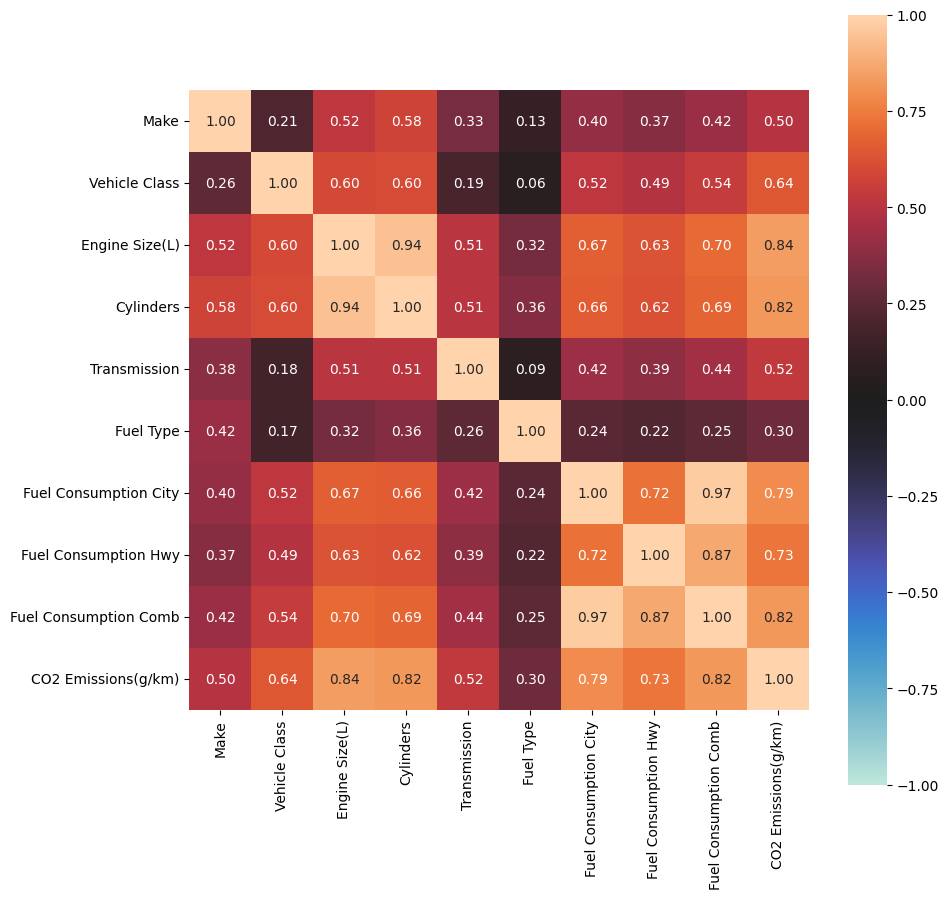

In [200]:
from dython.nominal import associations

df_temp = pd.concat([df_train, df_train_target], axis=1)

associations(
    df_temp,
    nom_nom_assoc="theil",
    plot=True,
    nan_strategy="drop_samples",
    # clustering=True,
    figsize=(10, 10),
)
print()

c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


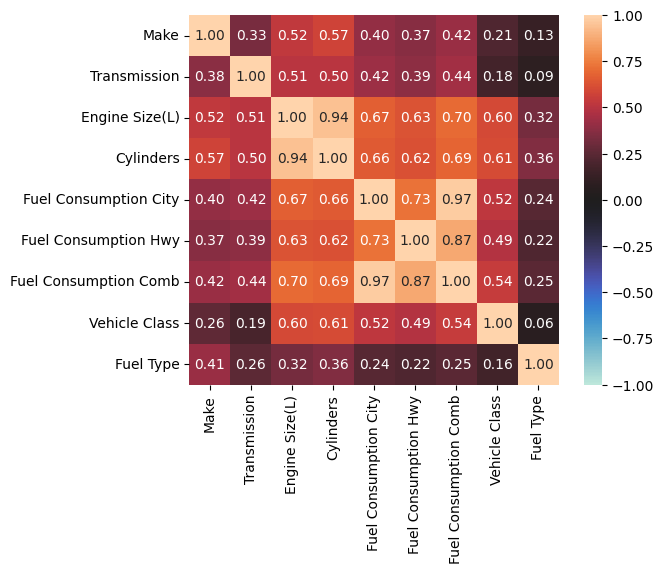

In [201]:
df_temp = pd.concat([df_train, df_test], axis=0)

associations(
    df_temp,
    nom_nom_assoc="theil",
    plot=True,
    nan_strategy="drop_samples",
    clustering=True,
)
print()

In [202]:
def process_transmission(df):
    # Create a mapping for transmission types
    transmission_mapping = {
        "A": "Automatic",
        "AM": "Automatic",
        "AS": "Automatic",
        "AV": "Automatic",
        "M": "Manual",
    }

    # Extract the transmission type using a regular expression
    df["Transmission Origin"] = df["Transmission"].str.extract(r"(\D+)")

    # Apply the mapping to the 'Transmission_Type' column
    df["Transmission Type"] = df["Transmission Origin"].map(transmission_mapping)

    # Extract the number of gears
    df["Gears"] = df["Transmission"].str.extract("(\d+)").astype("Int64")

    return df

In [203]:
df_train = process_transmission(df_train)
df_test = process_transmission(df_test)

In [204]:
def group_vehicle_classes(df):
    # Create a mapping for vehicle classes
    vehicle_class_mapping = {
        "SUV - SMALL": "SUV",
        "SUV - STANDARD": "SUV",
        "PICKUP TRUCK - STANDARD": "PICKUP TRUCK",
        "PICKUP TRUCK - SMALL": "PICKUP TRUCK",
        "STATION WAGON - SMALL": "STATION WAGON",
        "STATION WAGON - MID-SIZE": "STATION WAGON",
        "VAN - CARGO": "VAN",
        "VAN - PASSENGER": "VAN",
    }

    # Apply the mapping to the 'Vehicle Class' column
    df["Vehicle Class General"] = df["Vehicle Class"].replace(vehicle_class_mapping)

    return df

In [205]:
df_train = group_vehicle_classes(df_train)
df_test = group_vehicle_classes(df_test)

In [206]:
def group_vehicle_types(df):
    # Create a mapping for vehicle types
    vehicle_type_mapping = {
        "SMALL": "Small",
        "MID-SIZE": "Mid-Size",
        "FULL-SIZE": "Full-Size",
        "PASSENGER": "Passenger",
        "CARGO": "Cargo",
        "STANDARD" : "Standard",
    }

    # Create a new column 'Vehicle Type'
    df["Vehicle Type"] = df["Vehicle Class"]

    # Apply the mapping to the 'Vehicle Type' column
    for key, value in vehicle_type_mapping.items():
        mask = df["Vehicle Type"].notna() & df["Vehicle Type"].str.contains(key)
        df.loc[mask, "Vehicle Type"] = value.upper()

    return df

In [207]:
df_train = group_vehicle_types(df_train)
df_test = group_vehicle_types(df_test)

c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


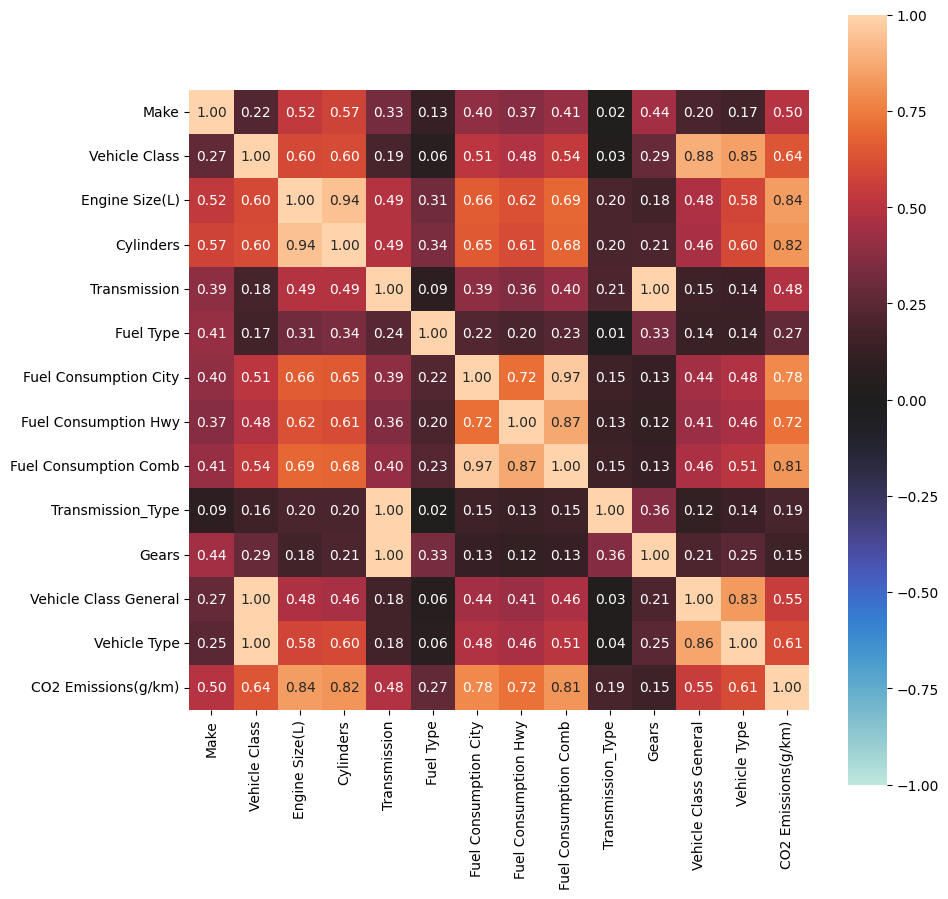

In [208]:
df_temp = pd.concat([df_train, df_train_target], axis=1)

associations(
    df_temp,
    nom_nom_assoc="theil",
    plot=True,
    nan_strategy="drop_samples",
    # clustering=True,
    figsize=(10, 10)
)
print()

In [209]:
df_train.insert(0, "Id", df_train_id)
df_train = pd.concat([df_train, df_train_target], axis=1)

df_test.insert(0, "Id", df_test_id)

df_train.to_csv("../dataset/train_cleaned.csv", index=False)
df_test.to_csv("../dataset/test_cleaned.csv", index=False)